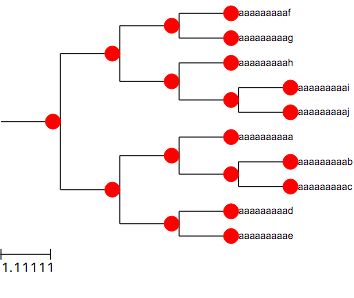

In [3]:
from ete3 import NCBITaxa, Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace



t = Tree()
t.populate(10)
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches

for node in t:
    node.add_features(count=14)  
    
for n in t.traverse():
   nstyle = NodeStyle()
   nstyle["fgcolor"] = "red"
   nstyle["size"] = 15
   n.set_style(nstyle)

  

# t.show(tree_style=ts)
t.render("%%inline", w=100, units="mm", tree_style=ts)

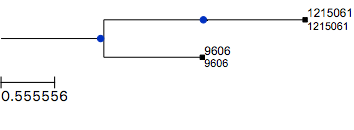

In [2]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()
file_path=""

# tax_list = list(taxDic.keys())
tax_list = [1215061, 1496, 9606]
tree = ncbi.get_topology(tax_list, intermediate_nodes=False)

for node in tree:
    node.add_features(count=14) 
    
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches

tree.render("%%inline", w=100, units="mm", tree_style=ts)


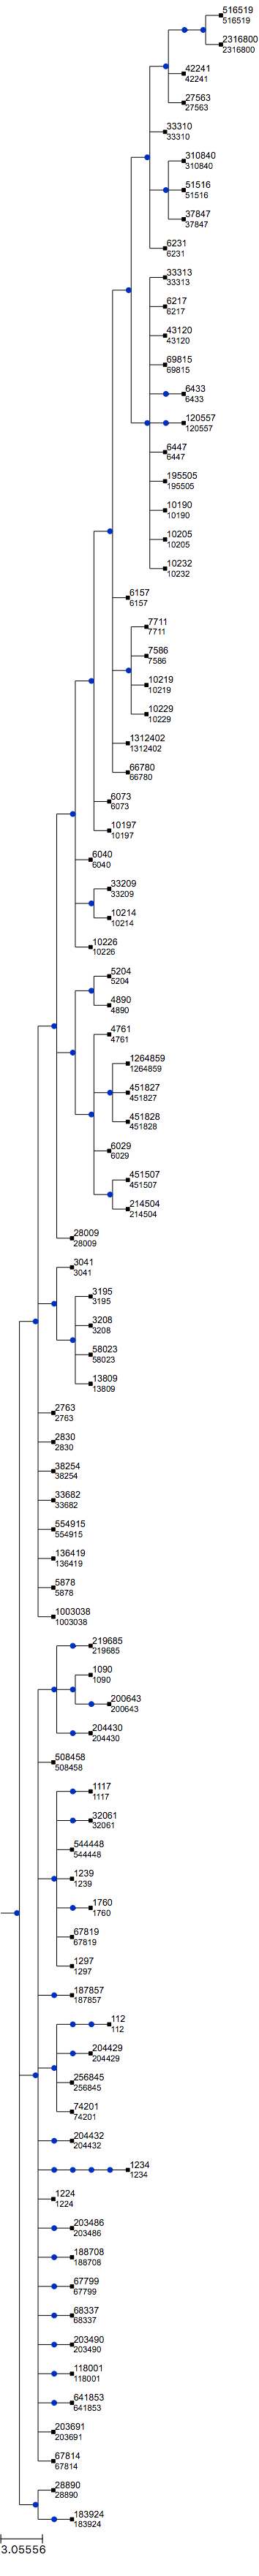

In [7]:
tax_list = [1783257, 195505, 10214, 37847, 3041, 219685, 10219, 131567, 451507, 69815, 204428, 204429, 189778, 189779, 1090, 6447, 10205, 6157, 10197, 10190, 6656, 57723, 74152, 204430, 204432, 200938, 187857, 1234, 203691, 136419, 203693, 1783270, 4890, 10232, 112, 200643, 256845, 200930, 33317, 33313, 33310, 33154, 203683, 203682, 120557, 214504, 2763, 1239, 1003038, 200795, 67819, 28890, 188708, 10229, 1206794, 10226, 67814, 67799, 28009, 43120, 200940, 451827, 1798711, 6073, 6072, 641853, 5878, 451828, 33209, 33208, 1224, 1312402, 183924, 118001, 7711, 976, 38254, 6433, 6040, 2, 28889, 2830, 65842, 1783272, 33213, 310840, 13809, 33682, 32061, 32066, 42241, 544448, 27563, 7568, 3208, 6217, 200783, 68337, 40117, 68336, 2759, 58023, 554915, 51516, 4761, 88770, 68297, 1264859, 200918, 6340, 203490, 516519, 74201, 201174, 1, 6029, 1117, 1297, 142182, 5204, 203486, 7586, 3195, 508458, 66780, 1760, 2316800, 6231]


taxlist = list()
for item in tax_list:
    taxlist.append(int(item))
tree = ncbi.get_topology(taxlist, intermediate_nodes=False)

for node in tree:
    node.add_features(count=14) 
    
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches

tree.render("%%inline", w=100, units="mm", tree_style=ts)


In [11]:
print (tree.get_ascii(attributes=["sci_name", "rank", "name"], show_internal=False))



   /- /-Clostridioides difficile E10, no rank, 1215061
--|
   \-Homo sapiens, species, 9606


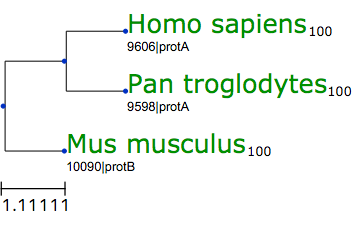

In [4]:
from ete3 import NCBITaxa, PhyloTree, Tree

def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("sci_name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=0)
        node.add_face(TextFace(rank), column=2, position = "branch-right")

        
ncbi = NCBITaxa()

setData=set()
listData = list()


# load the whole leaf name as species taxid
tree = PhyloTree('((9606, 9598), 10090);', sp_naming_function=lambda name: name)
tax2names, tax2lineages, tax2rank = tree.annotate_ncbi_taxa()

# split names by '|' and return the first part as the species taxid
tree = PhyloTree('((9606|protA, 9598|protA), 10090|protB);', sp_naming_function=lambda name: name.split('|')[0])
tax2names, tax2lineages, tax2rank = tree.annotate_ncbi_taxa()

# print (tree.get_ascii(attributes=["name", "sci_name", "taxid"]))

ts.layout_fn = layout


tree.render("%%inline", w=100, units="mm", tree_style=ts)
# tree.show(tree_style =ts)


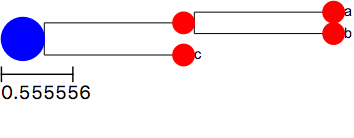

In [13]:
from ete3 import Tree, NodeStyle, TreeStyle

nwk= "((Thaumarchaeota :157504 ,Nanoarchaeota :6589 ,'Candidatus :Korarchaeota' ,Euryarchaeota :2035969 )Archaea :2971444 ,(Amoebozoa :152146 ,Cercozoa :15528 ,Foraminifera :40121 ,(Tardigrada :44733 ,Nematomorpha :159 ,Chaetognatha :1217 ,Placozoa :22853 ,Hemichordata :22370 ,Bryozoa :1234 ,Rotifera :6317 ,Chordata :10283796 ,Brachiopoda :34931 ,Acanthocephala ,Mollusca :409115 ,Sipuncula :533 ,Nematoda :958694 ,Nemertea :1826 ,Platyhelminthes :212555 ,Cnidaria :226507 ,Porifera :28157 )Metazoa :16695737 ,(Microsporidia :85025 ,Basidiomycota :2248067 ,Ascomycota :6226822 ,Chytridiomycota :147701 )Fungi :9525750 ,((Magnoliophyta :6589049 ,Bryophyta :58530 )Streptophyta :6892507 ,Chlorophyta :252935 )Viridiplantae :7145447 ,Haptophyceae :53995 ,Rhodophyta :93775 )Eukaryota :35948277 ,(Tenericutes :279699 ,Synergistetes :69627 ,Lentisphaerae :59628 ,Actinobacteria :23795775 ,Verrucomicrobia :738659 ,Armatimonadetes :88743 ,Caldiserica :11351 ,Acidobacteria ,Firmicutes :23741745 ,Proteobacteria :63736856 ,Cyanobacteria :2220007 ,Chlorobi :72712 ,Bacteroidetes :8932164 )Bacteria :132338858 );"
t = Tree( "((a,b),c);")

# Basic tree style
ts = TreeStyle()
ts.show_leaf_name = True

# Creates an independent node style for each node, which is
# initialized with a red foreground color.
for n in t.traverse():
   nstyle = NodeStyle()
   nstyle["fgcolor"] = "red"
   nstyle["size"] = 15
   n.set_style(nstyle)

# Let's now modify the aspect of the root node
t.img_style["size"] = 30
t.img_style["fgcolor"] = "blue"

t.render("%%inline", w=100, units="mm", tree_style=ts)


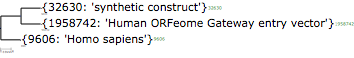

In [14]:
from ete3 import NCBITaxa, Tree, faces, AttrFace, TreeStyle, NodeStyle, TextFace
t = Tree("((32630:1,1958742:1)1:1,9606:1);" )

ncbi = NCBITaxa()

def layout(node):

    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
#         print(ncbi.get_taxid_translator([node.name]))
        faces.add_face_to_node(nameFace, node, column=2)
        faces.add_face_to_node(TextFace(ncbi.get_taxid_translator([node.name]), fsize=50), node, column=0)

#         node.add_face(TextFace(rank), column=1, position = "branch-right")


        
        
# Basic tree style
ts = TreeStyle()
ts.show_leaf_name = True
ts.layout_fn = layout



nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

t.render("%%inline", w=100, units="mm", tree_style=ts)


In [72]:
# Import Tree instance and faces module
from ete3 import ClusterTree
# Example of a minimalistic numerical matrix. It is encoded as a text
# string for convenience, but it usally be loaded from a text file.
matrix = """
#Names\tcol1\tcol2\tcol3\tcol4\tcol5\tcol6\tcol7
A\t-1.23\t-0.81\t1.79\t0.78\t-0.42\t-0.69\t0.58
B\t-1.76\t-0.94\t1.16\t0.36\t0.41\t-0.35\t1.12
C\t-2.19\t0.13\t0.65\t-0.51\t0.52\t1.04\t0.36
D\t-1.22\t-0.98\t0.79\t-0.76\t-0.29\t1.54\t0.93
E\t-1.47\t-0.83\t0.85\t0.07\t-0.81\t1.53\t0.65
F\t-1.04\t-1.11\t0.87\t-0.14\t-0.80\t1.74\t0.48
G\t-1.57\t-1.17\t1.29\t0.23\t-0.20\t1.17\t0.26
H\t-1.53\t-1.25\t0.59\t-0.30\t0.32\t1.41\t0.77
"""
print ("Example numerical matrix")
print (matrix)
# We load a tree structure whose leaf nodes correspond to rows in the
# numerical matrix. 

# We use the text_array argument to link the tree
# with numerical matrix.
t = ClusterTree("(((A,B),(C,(D,E))),(F,(G,H)));", text_array=matrix)

Example numerical matrix

#Names	col1	col2	col3	col4	col5	col6	col7
A	-1.23	-0.81	1.79	0.78	-0.42	-0.69	0.58
B	-1.76	-0.94	1.16	0.36	0.41	-0.35	1.12
C	-2.19	0.13	0.65	-0.51	0.52	1.04	0.36
D	-1.22	-0.98	0.79	-0.76	-0.29	1.54	0.93
E	-1.47	-0.83	0.85	0.07	-0.81	1.53	0.65
F	-1.04	-1.11	0.87	-0.14	-0.80	1.74	0.48
G	-1.57	-1.17	1.29	0.23	-0.20	1.17	0.26
H	-1.53	-1.25	0.59	-0.30	0.32	1.41	0.77




cluster_cbars


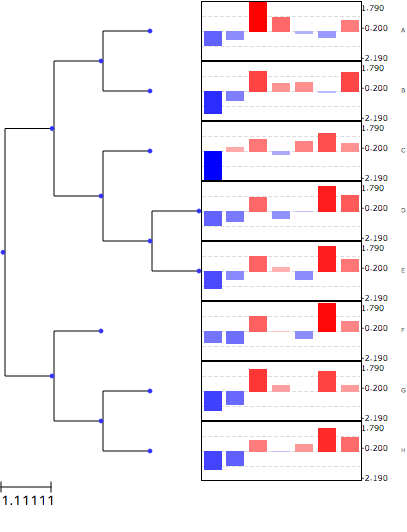

In [73]:
print("\ncluster_cbars")
t.render("%%inline", "cluster_cbars")

cluster_bars


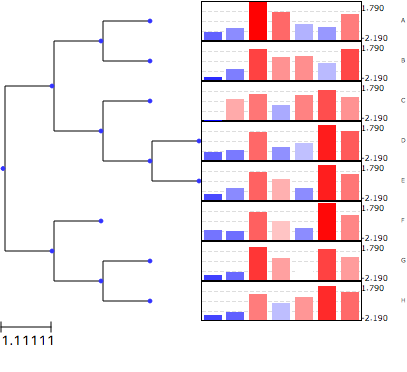

In [5]:
print("cluster_bars")
t.render("%%inline", "cluster_bars")

In [ ]:
nwk2= "(((((((((((((((((((((((((((((((Manduca_sexta)Manduca)Sphingini)Sphinginae)Sphingidae)Bombycoidea)Obtectomera)Ditrysia)Heteroneura)Neolepidoptera)Glossata)Lepidoptera)Amphiesmenoptera)Holometabola)Neoptera)Pterygota)Dicondylia)Insecta)Hexapoda)Pancrustacea)Mandibulata)Arthropoda)Panarthropoda)Ecdysozoa)Protostomia,((((((((((((((((((((((Bos_taurus)Bos)Bovinae)Bovidae)Pecora)Ruminantia)Cetartiodactyla)Laurasiatheria)Boreoeutheria)Eutheria)Theria)Mammalia)Amniota)Tetrapoda)Dipnotetrapodomorpha)Sarcopterygii)Euteleostomi)Teleostomi)Gnathostomata)Vertebrata)Craniata)Chordata)Deuterostomia)Bilateria)Eumetazoa)Metazoa)Opisthokonta)Eukaryota)cellular_organisms,((synthetic_construct)artificial_sequences)other_sequences);"
t = Tree( nwk2 )
t.render("%%inline", w=100, units="mm", tree_style=ts)


## Annotate tree with sci_name

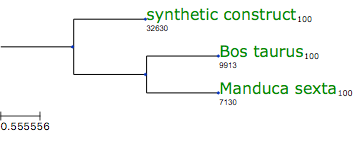

In [15]:
##### 1K9O:32630=3;7130=2;9913=2

from ete3 import NCBITaxa, PhyloTree, Tree, faces, AttrFace, TreeStyle
ncbi = NCBITaxa()

def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("sci_name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=0)
        node.add_face(TextFace(rank), column=2, position = "branch-right")



tree = ncbi.get_topology([32630, 7130,9913], intermediate_nodes=False)

ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout

tree.render("%%inline", w=100, units="mm", tree_style=ts)


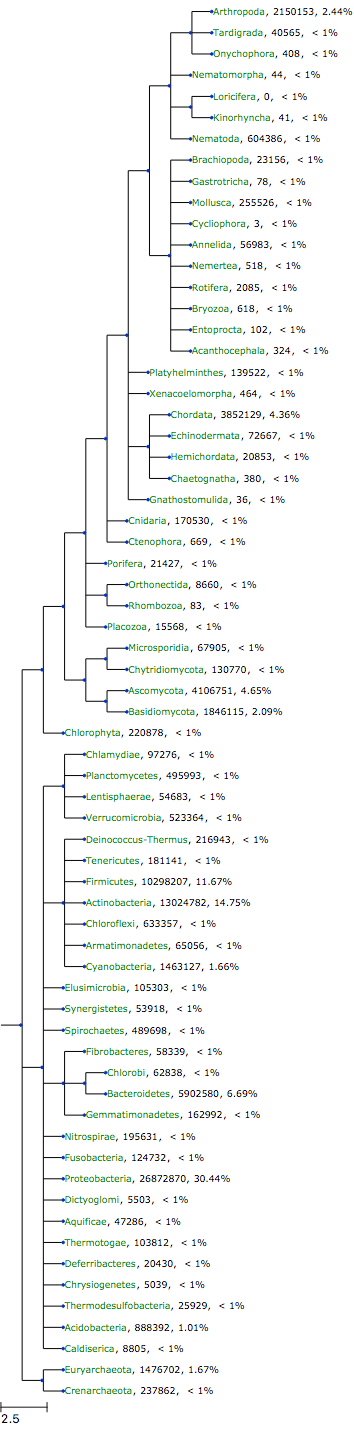

In [51]:

from ete3 import NCBITaxa, PhyloTree, Tree, faces, AttrFace, TreeStyle

ncbi = NCBITaxa()
taxlist =list()
taxDic = dict()

def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("sci_name",  fgcolor="#009000")
    nameFace2 = faces.AttrFace("rank",  fgcolor="#009000") #fsize=20,


    rank = 100
    if node.is_leaf():
#         faces.add_face_to_node(nameFace, node, column=0)
        #faces.add_face_to_node(nameFace2, node, column=1)

        node.add_face(nameFace, column=2)
        node.add_face(TextFace(", "), column=3)
        node.add_face(TextFace(taxDic[int(node.name)]), column=4)
        
        node.add_face(TextFace(", "), column=5)


        percentages = 100 * float(taxDic[int(node.name)])/float(88276733) 
        
        if percentages < 1: 
            node.add_face(TextFace( " < 1%" ), column=6)
        else:
            node.add_face(TextFace(str(round(percentages, 2)) + "%" ), column=6)




        

with open('interested_taxids', "r") as f:
    for line in f:
        taxid = line.split()[0]
        seq_count = line.split()[1]

        rank = ncbi.get_rank([int(taxid)])
        if rank[int(taxid)]=='phylum':
            taxlist.append(int(taxid))
            taxDic [int(taxid)] = int(seq_count)


tree = ncbi.get_topology(taxlist, intermediate_nodes=False)
tmp_tree2 = tree.get_ascii(attributes=["sci_name", "rank"])

# print(taxlist)
# print(tmp_tree2)

# print (tree.get_ascii(attributes=["sci_name", "rank", "name"], show_internal=False))


ts = TreeStyle()
ts.show_leaf_name = False
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout

tree.render("%%inline", w=100, units="mm", tree_style=ts)





## Example of misannotations
#### Boa output

```
count[NP_001026909][AAH13172][9606] = 1
count[NP_001026909][AEE60937][9606] = 1
count[NP_001026909][AIC53124][32630] = 1
count[NP_001026909][EAW98870][9606] = 1
count[NP_001026909][EAW98876][9606] = 1
count[NP_001026909][NP_001026909][9606] = 1
count[NP_001026909][Q96DX5][9606] = 1
count[NP_001026909][SJX33320][1958742] = 1
count[NP_001026909][XP_005274503][9606] = 1



                                          /-synthetic construct, species, 1
             /artificial sequences, no rank
-root, no rank                            \-Human ORFeome Gateway entry vector, species, 1
            |
             \-Homo sapiens, species, 7
             
             
```

Error in tree ncbi
Error in tree ncbi
Error in tree ncbi


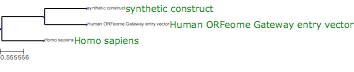

In [7]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()


def layout(node):

    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=2)
        try:
            txt2name=ncbi.get_taxid_translator([node.name])

            for item in txt2name:
                sci_name =txt2name[item]

            faces.add_face_to_node(TextFace(sci_name, fsize=30), node, column=0)

        except:
            print("Error in tree ncbi")

tax_list = [9606, 32630, 1958742]
# tree = ncbi.get_topology(tax_list, intermediate_nodes=False)
tree= Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);")

for node in tree:
    node.add_features(count=14) 
    
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout


tree.render("%%inline", w=100, units="mm", tree_style=ts)


In [8]:
print(tree.write())

((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);


In [9]:
print (tree.get_ascii(attributes=["name", "sci_name"]))
#((synthetic construct:1,Human ORFeome Gateway entry vector:1)root:1,Homo sapiens:1);


      /-synthetic construct
   /-|
--|   \-Human ORFeome Gateway entry vector
  |
   \-Homo sapiens


In [10]:
print(Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);", format=2))


      /-synthetic construct
   /-|
--|   \-Human ORFeome Gateway entry vector
  |
   \-Homo sapiens


In [11]:
# Import Tree instance and faces module
from ete3 import ClusterTree
# Example of a minimalistic numerical matrix. It is encoded as a text
# string for convenience, but it usally be loaded from a text file.

#print(Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);", format=2))
matrix = """
#Names\tRefSeq\tGenBank\tPDB\tSwissProt\tTrEMBL
Homo sapiens\t1\t5.0\t0\t1\t0  
synthetic construct\t0\t1\t0\t0\t0  
Human ORFeome Gateway entry vector\t1\t0\t0\t0\t0  
"""
print ("Example numerical matrix")
print (matrix)
# We load a tree structure whose leaf nodes correspond to rows in the
# numerical matrix. 

# We use the text_array argument to link the tree
# with numerical matrix.
t = ClusterTree(tree.write(),  text_array=matrix)

Example numerical matrix

#Names	RefSeq	GenBank	PDB	SwissProt	TrEMBL
Homo sapiens	1	5.0	0	1	0  
synthetic construct	0	1	0	0	0  
Human ORFeome Gateway entry vector	1	0	0	0	0  



cluster_bars


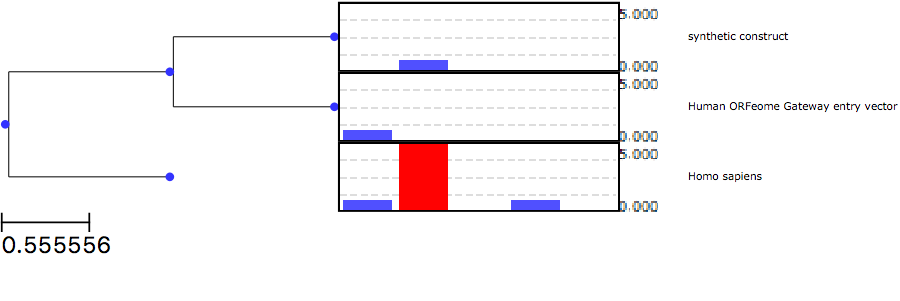

In [12]:
print("cluster_bars")
t.render("%%inline", "cluster_bars", w=900)

In [104]:
from ete3 import Tree
t = Tree("((A, B)Internal_1:0.7, (C, D)Internal_2:0.5)root:1.3;", format=1)
# we add a custom annotation to the node named A
(t & "A").add_features(label="custom Value")
# we add a complex feature to the A node, consisting of a list of lists
(t & "A").add_features(complex=[[0,1], [2,3], [1,11], [1,0]])
print(t.write(format=1))
print (t.get_ascii(attributes=["name", "dist", "label", "complex"]))

((A:1,B:1)Internal_1:0.7,(C:1,D:1)Internal_2:0.5);

                        /-A, 1.0, custom Value, [[0, 1], [2, 3], [1, 11], [1, 0]]
         /Internal_1, 0.7
        |               \-B, 1.0
-root, 1.3
        |               /-C, 1.0
         \Internal_2, 0.5
                        \-D, 1.0


## Cluster misannotations (cid =169919)

### Boa query to get cluster ID, sequence ID, and tax id

```
s: Sequence = input;
counts: output sum[string][string][string] of int;

foreach(i:int; def(s.cluster[i])){
  if (s.cluster[i].similarity==95){
    foreach(j:int; def(s.annotation[j]))
	  counts [s.cluster[i].cid][s.annotation[j].keyID][s.annotation[j].tax_id] <<1;
  }
}

```

#### Outupt:

```
counts[4068274][ABY50073][490503] = 1
counts[4695268][ABY50072][490503] = 1
counts[490503][AAF97425][69577] = 1
counts[490503][AAR86692][328670] = 1
counts[490503][AAS48724][69577] = 1
counts[490503][ABU53625][69577] = 1
counts[490503][ABU53626][69577] = 1
counts[490503][ABU53627][69577] = 1
counts[490503][ABU53628][69577] = 1
counts[490503][ABU53629][69577] = 1
counts[490503][ABU53630][69577] = 1
counts[490503][ABU53631][69577] = 1
counts[490503][ABU53632][69577] = 1
counts[490503][ACL37065][69577] = 1
counts[490503][ACL37066][69577] = 1
counts[490503][ACL37067][69577] = 1
counts[490503][ADB24016][52838] = 1
counts[490503][ADB24017][52838] = 1
counts[490503][ADB24018][52838] = 1
counts[490503][ADB24019][52838] = 1
counts[490503][ADB24020][52838] = 1
counts[490503][ADB24021][52838] = 1
counts[490503][ADB24022][52838] = 1
counts[490503][ADB24023][52838] = 1
counts[490503][ADB24024][52838] = 1
counts[490503][ADB24025][52838] = 1
counts[490503][ADB24026][52838] = 1
counts[490503][ADB24027][52838] = 1
counts[490503][ADB24028][52838] = 1
counts[490503][ADB24029][52838] = 1
counts[490503][ADB24030][52838] = 1
counts[490503][ADB24031][52838] = 1
counts[490503][ADB24032][52838] = 1
counts[490503][ADB24033][52838] = 1
counts[490503][ADB24034][52838] = 1
counts[490503][ADB24035][52838] = 1
counts[490503][AEP82796][328670] = 1
counts[490503][AEP82797][328670] = 1
counts[490503][AEP82798][328670] = 1
counts[490503][AEP82799][328670] = 1
counts[490503][AEP82800][328670] = 1
counts[490503][AEP82801][328670] = 1
counts[490503][AEP82802][328670] = 1
counts[490503][AEP82803][328670] = 1
counts[490503][AEP82804][328670] = 1
counts[490503][AEP82805][328670] = 1
counts[490503][AEP82806][328670] = 1
counts[490503][AEP82807][328670] = 1
counts[490503][AHA62482][328670] = 1
counts[490503][AHM92951][328670] = 1
counts[490503][ANK58362][69577] = 1
counts[490503][APW78128][328670] = 1
counts[490503][APW78129][328670] = 1
counts[490503][APW78131][328670] = 1
counts[490503][AQL57118][328670] = 1
counts[490503][AQL57119][328670] = 1
counts[490503][ASB34187][69577] = 1
counts[490503][ASB34188][69577] = 1
counts[490503][ASB34189][69577] = 1
counts[490503][CAI91424][328670] = 1
counts[490503][CAI91425][328670] = 1
counts[490503][CAI91426][328670] = 1
counts[490503][CAI91427][328670] = 1
counts[490503][CAI91428][328670] = 1
counts[490503][CAI91429][328670] = 1
counts[490503][CAI91430][328670] = 1
counts[490503][CAI91431][328670] = 1
counts[490503][CAI91432][328670] = 1
counts[490503][CAP19917][69577] = 1
counts[490503][YP_233107][328670] = 1

```

##### Tree

```
 
                              /-Banana streak GF virus, species, 30
             /Badnavirus, genus
-root, no rank                \-Banana streak virus, species, 18
            |
             \-Musa balbisiana, species, 20   
             
```    


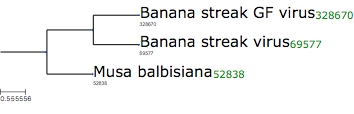

In [8]:
from ete3 import NCBITaxa
ncbi = NCBITaxa()


def layout(node):

    # If node is a leaf, add the nodes name and a its scientific name
    nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

    rank = 100
    if node.is_leaf():
        faces.add_face_to_node(nameFace, node, column=2)
        try:
            txt2name=ncbi.get_taxid_translator([node.name])

            for item in txt2name:
                sci_name =txt2name[item]

            faces.add_face_to_node(TextFace(sci_name, fsize=30), node, column=0)

        except:
            print("Error in tree ncbi")

tax_list = [69577,328670, 52838, 328670 ]
tree = ncbi.get_topology(tax_list, intermediate_nodes=False)
# tree= Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);")

for node in tree:
    node.add_features(count=14) 
    
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 10 # 10 pixels between adjacent branches
ts.layout_fn = layout


tree.render("%%inline", w=100, units="mm", tree_style=ts)


In [9]:
print(tree.write())

((328670:1,69577:1)1:1,52838:1);


In [10]:
print (tree.get_ascii(attributes=["name", "sci_name"]))



                        /-328670, Banana streak GF virus
       /10652, Badnavirus
-1, root                \-69577, Banana streak virus
      |
       \-52838, Musa balbisiana


In [12]:
tree= Tree("((Banana streak GF virus:1,Banana streak virus:1)1:1,Musa balbisiana:1);")


In [23]:
# Import Tree instance and faces module
from ete3 import ClusterTree
# Example of a minimalistic numerical matrix. It is encoded as a text
# string for convenience, but it usally be loaded from a text file.

#print(Tree("((synthetic construct:1,Human ORFeome Gateway entry vector:1)1:1,Homo sapiens:1);", format=2))
matrix = """
#Names\tRefSeq\tGenBank\tPDB\tSwissProt\tTrEMBL
Banana streak GF virus\t2\t28\t0\t0\t0  
Banana streak virus\t2\t16\t0\t0\t0  
Musa balbisiana\t0\t20\t0\t0\t0  
"""
print ("Example numerical matrix")
print (matrix)
# We load a tree structure whose leaf nodes correspond to rows in the
# numerical matrix. 

# We use the text_array argument to link the tree
# with numerical matrix.
t = ClusterTree(tree.write(),  text_array=matrix)

Example numerical matrix

#Names	RefSeq	GenBank	PDB	SwissProt	TrEMBL
Banana streak GF virus	2	28	0	0	0  
Banana streak virus	2	16	0	0	0  
Musa balbisiana	0	20	0	0	0  



cluster_bars


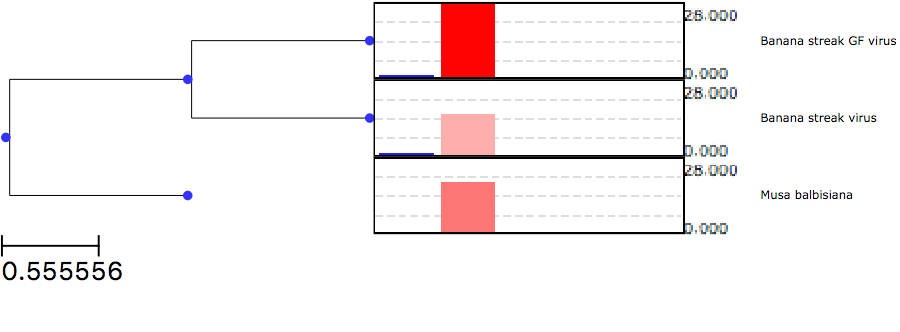

In [24]:
print("cluster_bars")
t.render("%%inline", "cluster_bars", w=900)

In [26]:
str =  "count[12E8][3JAB][9913] = 4"
words = str.split("[")
words


['count', '12E8]', '3JAB]', '9913] = 4']